<a href="https://colab.research.google.com/github/abirhazra/Reinforcement-Learning/blob/main/Custom_Environment_for_Deep_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.3.0
!pip install gym
!pip install keras
!pip install keras-rl2

     |████████████████████████████████| 320.4MB 40kB/s 
     |████████████████████████████████| 20.1MB 1.2MB/s 
     |████████████████████████████████| 460kB 38.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


     |████████████████████████████████| 61kB 3.1MB/s 


In [ ]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [ ]:
class ShowerEnv(Env):
    def __init__(self):
        # Actions we can take, down, stay, up
        self.action_space = Discrete(3)
        # Temperature array
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        # Set start temp
        self.state = 38 + random.randint(-3,3)
        # Set shower length
        self.shower_length = 60
        
    def step(self, action):
        # Apply action
        # 0 -1 = -1 temperature
        # 1 -1 = 0 
        # 2 -1 = 1 temperature 
        self.state += action -1 
        # Reduce shower length by 1 second
        self.shower_length -= 1 
        
        # Calculate reward
        if self.state >=37 and self.state <=39: 
            reward =1 
        else: 
            reward = -1 
        
        # Check if shower is done
        if self.shower_length <= 0: 
            done = True
        else:
            done = False
        
        # Apply temperature noise
        #self.state += random.randint(-1,1)
        # Set placeholder for info
        info = {}
        
        # Return step information
        return self.state, reward, done, info

    def render(self):
        # Implement viz
        pass
    
    def reset(self):
        # Reset shower temperature
        self.state = 38 + random.randint(-3,3)
        # Reset shower time
        self.shower_length = 60 
        return self.state

In [ ]:
env = ShowerEnv()

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
env.observation_space.sample()

array([38.56013], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras import optimizers

In [ ]:
episodes = 1000
E=[]
S=[]
Sc=[]
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        #env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
        # S.append(episode)
        
    print('Episode:{} Score:{}'.format(episode, score))
    E.append(episode)
    S.append(reward)
    Sc.append(score)
    
    

Episode:1 Score:-58
Episode:2 Score:-18
Episode:3 Score:-26
Episode:4 Score:-28
Episode:5 Score:-60
Episode:6 Score:-50
Episode:7 Score:28
Episode:8 Score:-42
Episode:9 Score:-40
Episode:10 Score:-22
Episode:11 Score:-60
Episode:12 Score:-26
Episode:13 Score:-38
Episode:14 Score:-6
Episode:15 Score:-42
Episode:16 Score:30
Episode:17 Score:4
Episode:18 Score:26
Episode:19 Score:-44
Episode:20 Score:-28
Episode:21 Score:14
Episode:22 Score:-24
Episode:23 Score:12
Episode:24 Score:-24
Episode:25 Score:-30
Episode:26 Score:-12
Episode:27 Score:-52
Episode:28 Score:-56
Episode:29 Score:-40
Episode:30 Score:-58
Episode:31 Score:-12
Episode:32 Score:-52
Episode:33 Score:18
Episode:34 Score:-14
Episode:35 Score:-52
Episode:36 Score:-60
Episode:37 Score:-10
Episode:38 Score:-22
Episode:39 Score:-26
Episode:40 Score:-44
Episode:41 Score:-16
Episode:42 Score:-34
Episode:43 Score:-52
Episode:44 Score:8
Episode:45 Score:-36
Episode:46 Score:48
Episode:47 Score:-48
Episode:48 Score:-60
Episode:49 Sc

In [ ]:
#S

In [ ]:
#E

In [ ]:
#Sc

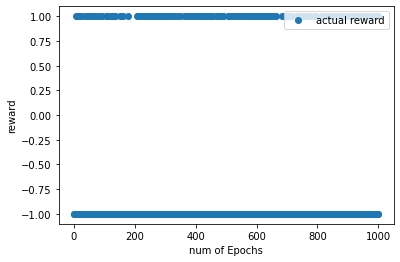

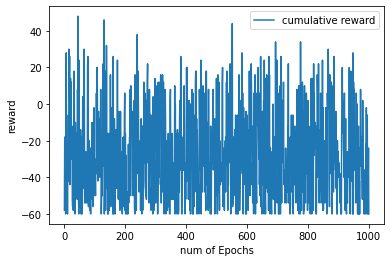

In [ ]:
# xpoints = np.array([1, 8])
# ypoints = np.array([3, 10])
plt.plot(E, S, 'o')
plt.xlabel('num of Epochs')
plt.ylabel('reward')
plt.legend(['actual reward'],loc=1)
plt.show()


plt.plot(E, Sc)
plt.xlabel('num of Epochs')
plt.ylabel('reward')
plt.legend(['cumulative reward'],loc=1)
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
states = env.observation_space.shape
actions = env.action_space.n

In [ ]:
states

(1,)

In [ ]:
actions

3

In [ ]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [ ]:
del model

In [ ]:
model = build_model(states, actions)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                48        
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 75        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [ ]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [ ]:
del dqn

In [ ]:
dqn = build_agent(model, actions)

In [ ]:
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
    1/10000 [..............................] - ETA: 9:06 - reward: -1.0000

/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 78s 8ms/step - reward: -0.2708
done, took 78.270 seconds


In [ ]:
scores = dqn.test(env, nb_episodes=1000, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 1000 episodes ...
Episode 1: reward: 60.000, steps: 60
Episode 2: reward: 58.000, steps: 60
Episode 3: reward: 60.000, steps: 60
Episode 4: reward: 60.000, steps: 60
Episode 5: reward: 58.000, steps: 60
Episode 6: reward: 58.000, steps: 60
Episode 7: reward: 58.000, steps: 60
Episode 8: reward: 60.000, steps: 60
Episode 9: reward: 58.000, steps: 60
Episode 10: reward: 58.000, steps: 60
Episode 11: reward: 58.000, steps: 60
Episode 12: reward: 60.000, steps: 60
Episode 13: reward: 60.000, steps: 60
Episode 14: reward: 60.000, steps: 60
Episode 15: reward: 60.000, steps: 60
Episode 16: reward: 58.000, steps: 60
Episode 17: reward: 60.000, steps: 60
Episode 18: reward: 60.000, steps: 60
Episode 19: reward: 60.000, steps: 60
Episode 20: reward: 58.000, steps: 60
Episode 21: reward: 60.000, steps: 60
Episode 22: reward: 58.000, steps: 60
Episode 23: reward: 60.000, steps: 60
Episode 24: reward: 60.000, steps: 60
Episode 25: reward: 60.000, steps: 60
Episode 26: reward: 60.000, s

In [ ]:
print('Test Loss:', score)
print('Test accuracy:', score)

Test Loss: -60
Test accuracy: -60


In [ ]:
# plt.plot(E, Sc)
# plt.xlabel('num of Epochs')
# plt.ylabel('reward')
# plt.legend(['cumulative reward'],loc=1)
# plt.show()

In [ ]:
_ = dqn.test(env, nb_episodes=15, visualize=True)

Testing for 15 episodes ...


TypeError: ignored

In [ ]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)

In [ ]:
del model
del dqn
del env

In [ ]:
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [ ]:
dqn.load_weights('dqn_weights.h5f')


In [ ]:
_ = dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...


TypeError: ignored